In [1]:
# example of a tidy dataset --> Pinguins dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Penguins is a tidy dataset. Why is this data tidy ?
Characteristics of tidy datasets:

- observational unit ==: one penguin
- each variable is a column
- the table is all about penguins

## Untidy datasets can violate the Tidy data structure rules above in different ways. For example:
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.shape

(344, 7)

## Let's visualize how many penguins are living on different islands, including the information about gender.

<Axes: xlabel='island', ylabel='count'>

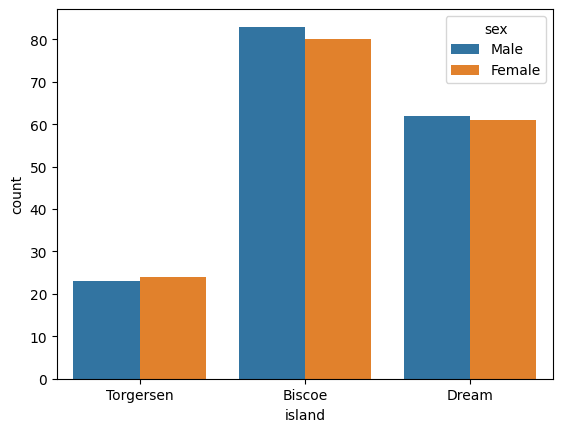

In [7]:
sns.countplot(data=penguins, hue='sex', x='island')

## Let's imagine we want now to compare penguins from different islands, but now we want to use the type of the bill measurement as the hue.

<Axes: xlabel='island', ylabel='bill_length_mm'>

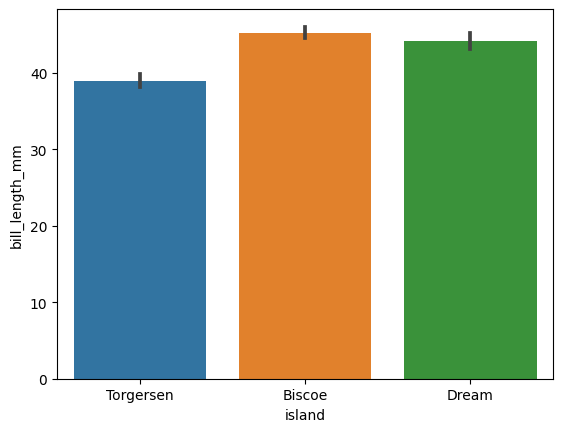

In [8]:
# let's experiment with the possible options: barplot instead of countplot

sns.barplot(data=penguins, x='island', y='bill_length_mm')

<Axes: xlabel='bill_length_mm', ylabel='island'>

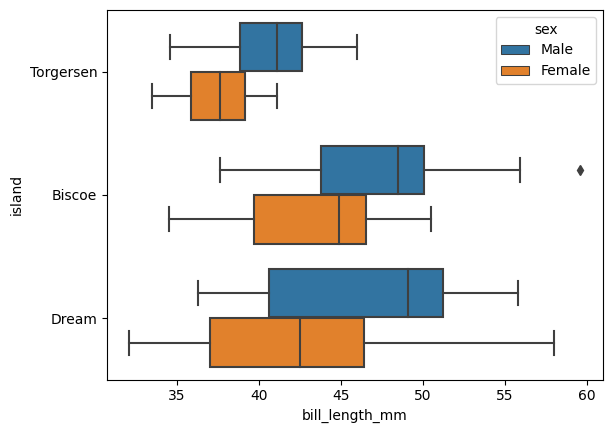

In [9]:
# let's experiment with the possible options: boxplot instead of barplot

sns.boxplot(hue='sex', y='island', x='bill_length_mm', data=penguins)

In [10]:
# before we do that, it would be helpful to add an additional penguin id column
penguins['id'] = penguins.index

In [11]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4


## Melt is used to transform the data from wide to long format.

- id_vars: <=== Column(s) to use as identifier variables
- value_vars: <=== Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
- var_name: <=== Name to use for the ‘variable’ column.
- value_name: <=== Name to use for the ‘value’ column.

In [12]:
# here is a melt expample:

penguins_long = pd.melt(penguins,                                        # dataset
                        id_vars=['id', 'sex', 'species', 'island'],      # Column(s) to use as identifier variables
                        value_vars=['bill_length_mm', 'bill_depth_mm'],  # Column(s) to unpivot
                        var_name='bill_measurement',                     # Name to use for the ‘variable’ column
                        value_name='value')                              # Name to use for the ‘value’ column

In [13]:
penguins_long.head()

,id,sex,species,island,bill_measurement,value
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
1,1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,2,Female,Adelie,Torgersen,bill_length_mm,40.3
3,3,NaN,Adelie,Torgersen,bill_length_mm,NaN
4,4,Female,Adelie,Torgersen,bill_length_mm,36.7


In [14]:
penguins_long.tail()

,id,sex,species,island,bill_measurement,value
683,339,NaN,Gentoo,Biscoe,bill_depth_mm,NaN
684,340,Female,Gentoo,Biscoe,bill_depth_mm,14.3
685,341,Male,Gentoo,Biscoe,bill_depth_mm,15.7
686,342,Female,Gentoo,Biscoe,bill_depth_mm,14.8
687,343,Male,Gentoo,Biscoe,bill_depth_mm,16.1


In [15]:
# now we have 2 measurments to bill mm. The melt function would also drop all columns that are not specified in the melt



In [16]:
penguins_long.shape

(688, 6)

<Axes: xlabel='island', ylabel='value'>

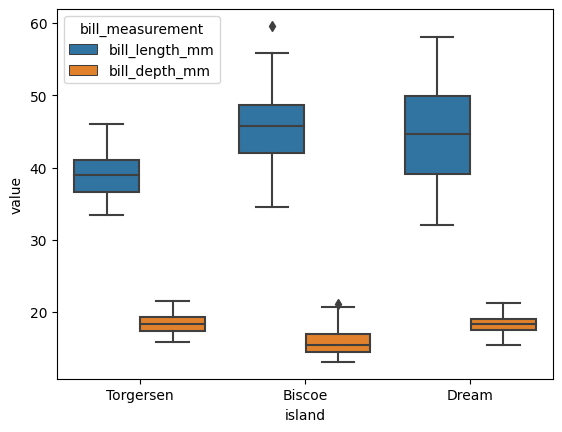

In [17]:
sns.boxplot(hue='bill_measurement', y='value', x='island', data=penguins_long)

# Come back to the previous format using pivot function

In [18]:
wide_penguins = pd.pivot(penguins_long,             # <===  tidy/long format df
                     columns='bill_measurement',    # <=== column(s) whose values we want as our new columns
                     index=['id', 'island', 'sex'], # <=== column(s) that will be used as a new index
                     values='value')                # <=== column whose values we want to populate our new wide dataframe

In [19]:
wide_penguins

,,bill_measurement,bill_depth_mm,bill_length_mm
id,island,sex,,
0,Torgersen,Male,18.7,39.1
1,Torgersen,Female,17.4,39.5
2,Torgersen,Female,18.0,40.3
3,Torgersen,NaN,NaN,NaN
4,Torgersen,Female,19.3,36.7
...,...,...,...,...
339,Biscoe,NaN,NaN,NaN
340,Biscoe,Female,14.3,46.8
341,Biscoe,Male,15.7,50.4


In [20]:
# to reset the columns, don't forget to reset the index too:

wide_penguins.reset_index()

bill_measurement,id,island,sex,bill_depth_mm,bill_length_mm
0,0,Torgersen,Male,18.7,39.1
1,1,Torgersen,Female,17.4,39.5
2,2,Torgersen,Female,18.0,40.3
3,3,Torgersen,NaN,NaN,NaN
4,4,Torgersen,Female,19.3,36.7
...,...,...,...,...,...
339,339,Biscoe,NaN,NaN,NaN
340,340,Biscoe,Female,14.3,46.8
341,341,Biscoe,Male,15.7,50.4
342,342,Biscoe,Female,14.8,45.2


## Pivot Table
- pivots table with aggregation
- default aggregation function is mean
- do not use unless you want to have aggregation
- if you have duplicates in the table pivot will return an error
- if you have duplicates in the table pivot_table will take the mean of the two observations
- please be careful which function you use and ensure the result you want is not aggregation without that being you goal

In [21]:
penguins_wide = penguins_long.pivot_table(values='value', 
                                            columns='bill_measurement',
                                            index=['island', 'sex'],
                                         aggfunc="mean")

# Bonus Exercise

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
fert = pd.read_csv('gapminder_total_Kopie.csv')

In [42]:
fert

,continent,country,year,Life_Expectancy,fertility,population
0,Africa,Algeria,1950,42.77,7.65,8872247.0
1,Africa,Algeria,1951,43.03,7.65,9039913.0
2,Africa,Algeria,1952,43.50,7.65,9216395.0
3,Africa,Algeria,1953,43.96,7.65,9405445.0
4,Africa,Algeria,1954,44.44,7.65,9609507.0
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,2.44,29427631.0
11084,South America,Venezuela,2012,74.60,2.42,29854238.0
11085,South America,Venezuela,2013,74.70,2.39,30276045.0
11086,South America,Venezuela,2014,74.80,2.36,30693827.0


In [43]:
fert['id'] = fert.index

In [44]:
fert

,continent,country,year,Life_Expectancy,fertility,population,id
0,Africa,Algeria,1950,42.77,7.65,8872247.0,0
1,Africa,Algeria,1951,43.03,7.65,9039913.0,1
2,Africa,Algeria,1952,43.50,7.65,9216395.0,2
3,Africa,Algeria,1953,43.96,7.65,9405445.0,3
4,Africa,Algeria,1954,44.44,7.65,9609507.0,4
...,...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,2.44,29427631.0,11083
11084,South America,Venezuela,2012,74.60,2.42,29854238.0,11084
11085,South America,Venezuela,2013,74.70,2.39,30276045.0,11085
11086,South America,Venezuela,2014,74.80,2.36,30693827.0,11086


<Axes: xlabel='continent', ylabel='fertility'>

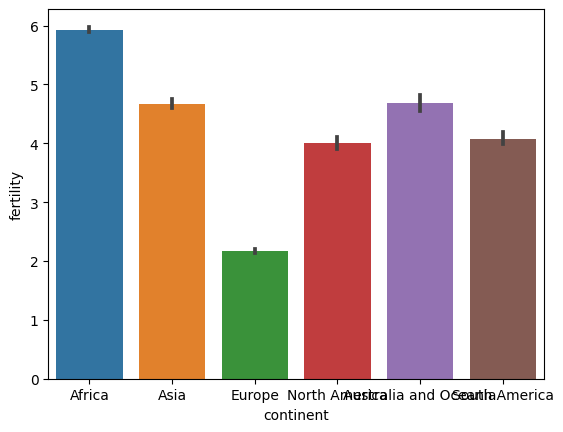

In [45]:
sns.barplot(data=fert, x='continent', y='fertility')

In [46]:
fert_long = pd.melt(fert,                                       
                        id_vars=['continent', 'country', 'year'],
                        value_vars=['Life_Expectancy', 'fertility'], 
                        var_name='measurement_type',                     
                        value_name='value')

In [47]:
fert_long

,continent,country,year,measurement_type,value
0,Africa,Algeria,1950,Life_Expectancy,42.77
1,Africa,Algeria,1951,Life_Expectancy,43.03
2,Africa,Algeria,1952,Life_Expectancy,43.50
3,Africa,Algeria,1953,Life_Expectancy,43.96
4,Africa,Algeria,1954,Life_Expectancy,44.44
...,...,...,...,...,...
22171,South America,Venezuela,2011,fertility,2.44
22172,South America,Venezuela,2012,fertility,2.42
22173,South America,Venezuela,2013,fertility,2.39
22174,South America,Venezuela,2014,fertility,2.36


In [48]:
fert.drop_duplicates(subset=['country'], keep='first', inplace=True)

In [49]:
fert_long

,continent,country,year,measurement_type,value
0,Africa,Algeria,1950,Life_Expectancy,42.77
1,Africa,Algeria,1951,Life_Expectancy,43.03
2,Africa,Algeria,1952,Life_Expectancy,43.50
3,Africa,Algeria,1953,Life_Expectancy,43.96
4,Africa,Algeria,1954,Life_Expectancy,44.44
...,...,...,...,...,...
22171,South America,Venezuela,2011,fertility,2.44
22172,South America,Venezuela,2012,fertility,2.42
22173,South America,Venezuela,2013,fertility,2.39
22174,South America,Venezuela,2014,fertility,2.36


<Axes: xlabel='value', ylabel='continent'>

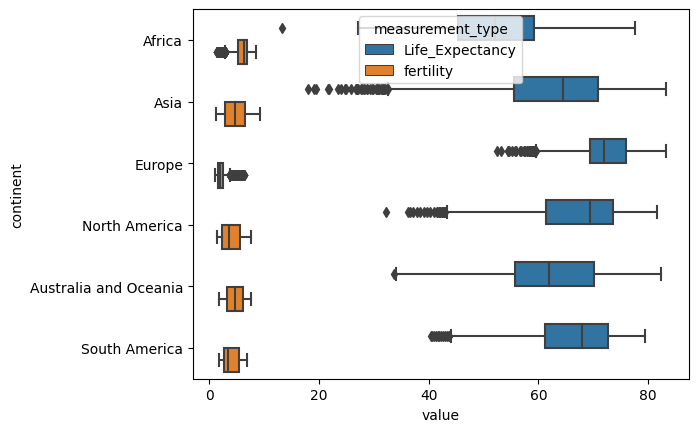

In [51]:
sns.boxplot(hue='measurement_type', y='continent', x='value', data=fert_long)

In [ ]:
fert_long.pivot(values='fertility_rate', 
                columns='year', 
                index='country')